# Cars 24 Price Prediction

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np

# Reading the data

In [6]:
df = pd.read_csv('data/cars24-car-price-cleaned.csv')

In [8]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


# EDA

In [9]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


## Data Preprocessing
1. Make and model columns have a lot of categories.
2. All columns are in different ranges. eg. age and km_driven.

### Target Encoding

In [10]:
df['model'].nunique(), df['make'].nunique()

(3233, 41)

Make has 41 categories and model has 3233 categories.

Using one hot encoding will increase the number of columns by 3254. This will make the model complex.
Instead we can use target encoding.

In [11]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')

In [12]:
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [13]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


### Data Scaling

All the columns are in different ranges. We need to scale the data.

We will use MinMaxScaler from sklearn to scale our data.

<img src="https://media.licdn.com/dms/image/v2/D4D12AQGP8LwyQQfojw/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1669525006395?e=2147483647&v=beta&t=jVVelw4mmMSTUmq24Qjo1zli5Oe7pz-D1cSNougg5Wo">

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
Scaler = MinMaxScaler()

In [19]:
df = pd.DataFrame(Scaler.fit_transform(df), columns=df.columns)

In [20]:
df

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.300934,0.862069,0.018258,0.168879,0.202014,0.099919,0.137931,0.484670,0.328028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19816,0.434413,0.931034,0.004711,0.116379,0.203347,0.138647,0.068966,0.194048,0.330632,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
19817,0.191724,0.793103,0.017606,0.147759,0.221860,0.158647,0.206897,0.318156,0.200656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19818,0.580027,0.827586,1.000000,0.103448,0.322719,0.217391,0.172414,0.324782,0.377671,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Linear Regression

## From Sklearn

In [21]:
# spilitting the data into training and testing data
from sklearn.model_selection import train_test_split

In [22]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13874, 17), (5946, 17), (13874,), (5946,))

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.coef_

array([ 0.12588418, -0.25016952, -0.228541  ,  0.07508445,  0.04530473,
       -0.12588418,  0.06460638,  0.86034164, -0.00702006, -0.00703094,
        0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
       -0.01629955, -0.02359347])

In [27]:
model.intercept_

np.float64(-0.011456351039687729)

/var/folders/8v/2n4zvcjd1hqd92r478cmjhl00000gp/T/ipykernel_82165/2294406906.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


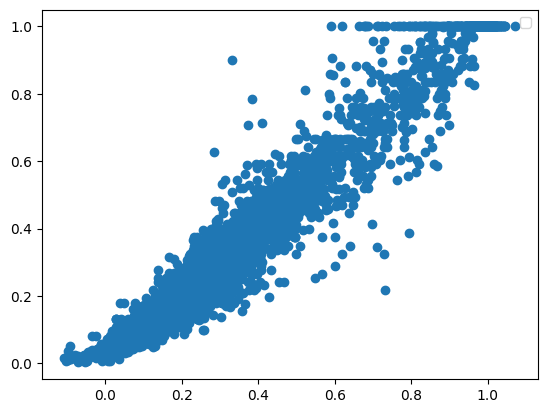

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)
plt.legend()
plt.show()

## From Scratch

In [37]:
# defining the prediction function
def predict(X, weights, bias):
    return np.dot(X, weights) + bias # y = mx + c or y = X.W + b

for x = 1 y = 2
for x = 2 y = 4
for x = 3 y = 6

y = 2x

y = 2*x + 0 which means m  =2 and c = 0

y_pred = 0*x+0  = 0 which means my loss (predicted - actual) = y_pred - y = 0-2 = -2

y_pred = 1*x + 0 = 1*1+0 = 1 which means my loss (predicted - actual) = y_pred - y = 1-2 = -1

y_pred = 2*x + 0 = 2*1+0 = 2 which means my loss (predicted - actual) = y_pred - y = 2-2 = 0

m = 2 which is the weights
c = 0 which is the bias

In [35]:
# defining the loss function for linear regression
def loss_function(y, y_pred):
    return np.mean((y - y_pred)**2) # mean squared error or 1/n * sum(y - y_pred)^2

In [82]:
def fit(x, y, learning_rate=0.001, max_iters=100):
    error_list = []
    weight_list = []
    bias_list = []
    
    weights = np.zeros(x.shape[1])
    bias = 0
    
    for i in range(max_iters):
        y_pred = predict(x, weights, bias)
        loss = loss_function(y, y_pred)
        error_list.append(loss)
        
        grad_w = (2*np.dot((y_pred - y), x)) / len(y)
        # Fix: Take mean of gradients for bias
        grad_b = (2*np.mean(y_pred - y))  # Simplified from (2*np.sum(y_pred - y)) / len(y)
        
        weights = weights - learning_rate * grad_w
        bias = bias - learning_rate * grad_b
        
        weight_list.append(weights)
        bias_list.append(bias)
    
    return weights, bias, error_list, weight_list, bias_list

In [83]:
weights, bias, error_list, weight_list, bias_list = fit(X_train, y_train, learning_rate=0.1,max_iters=1000)

In [84]:
weights

array([ 1.41605298e-01, -1.78752256e-02, -4.93569880e-02,  9.57033414e-02,
        1.36801237e-01, -1.80940275e-01,  1.51809427e-01,  7.59785031e-01,
       -7.59651098e-03, -6.67155556e-03,  3.32510268e-04,  4.31735246e-03,
        6.54359003e-03, -9.40926636e-03, -1.02680534e-02, -2.04597077e-02,
       -1.70626616e-02])

In [85]:
bias

np.float64(-0.039334977182931295)

In [60]:
error_list

[np.float64(0.14738274414813313),
 np.float64(0.07222781055673598),
 np.float64(0.056096392661673815),
 np.float64(0.050086174634654555),
 np.float64(0.046132182420094606),
 np.float64(0.0428553907869237),
 np.float64(0.039980093858458673),
 np.float64(0.03741965625696045),
 np.float64(0.035125452255024926),
 np.float64(0.033060837584259914),
 np.float64(0.03119581751754398),
 np.float64(0.029505309516632754),
 np.float64(0.02796816310919111),
 np.float64(0.02656643912848794),
 np.float64(0.025284839696111668),
 np.float64(0.024110249490021333),
 np.float64(0.023031364561439754),
 np.float64(0.02203839104672117),
 np.float64(0.021122799907898542),
 np.float64(0.020277126676176066),
 np.float64(0.019494807404077413),
 np.float64(0.018770043802894463),
 np.float64(0.018097691950940846),
 np.float64(0.017473170079863404),
 np.float64(0.016892381839909088),
 np.float64(0.016351652157358752),
 np.float64(0.015847673365459912),
 np.float64(0.015377459743613434),
 np.float64(0.014938308961727

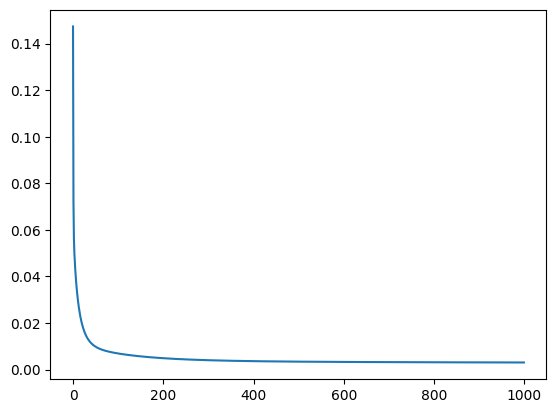

In [61]:
plt.plot(error_list)
plt.show()

## Model Evaluation

### Sklearn

#### Let's check the performance of our previously trained model on test data.

\
LinearRegression's default `.score()` function uses R2 score to evaluate the data.

In [29]:
model.score(X_train, y_train)

0.9457591024750988

In [30]:
model.score(X_test, y_test)

0.9458843076992296

### Scratch Model Evaluation

In [91]:
# scratch implementation of the R2 score

def r2_score(x, y, weights, bias):
    # Compute the predicted values
    y_pred = predict(x, weights, bias)
    # Calculate the mean of the input y values (not the full dataset)
    y_mean = np.mean(y)
    # Calculate the numerator of the R2 score (total sum of squares)
    numerator = np.sum((y - y_pred) ** 2)
    # Calculate the denominator of the R2 score (residual sum of squares)
    denominator = np.sum((y - y_mean) ** 2)
    # Calculate the R2 score
    r2 = 1 - (numerator / denominator)
    return r2

In [92]:
r2_score(X_train, y_train, weights, bias)

np.float64(0.9431789749388876)

In [93]:
r2_score(X_test, y_test, weights, bias)

np.float64(0.9433126419146597)

## Adjusted R2 Score

In [94]:
def adj_r2_score(x, y, weights, bias):
    r2 = r2_score(x, y, weights, bias)
    n = x.shape[0]
    d = x.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - d - 1))
    return adjusted_r2

In [96]:
# Adjusted R2 Score for Sklearn Model on training data
adj_r2_score(X_train, y_train, model.coef_, model.intercept_)

np.float64(0.9456925540298098)

In [97]:
# Adjusted R2 Score for Sklearn Model on testing data
adj_r2_score(X_test, y_test, model.coef_, model.intercept_)

np.float64(0.9457291176234682)

In [98]:
# Adjusted R2 Score for Scratch Model on training data
adj_r2_score(X_train, y_train, weights, bias)

np.float64(0.9431092609214194)

In [99]:
# Adjusted R2 Score for Scratch Model on training data
adj_r2_score(X_test, y_test, weights, bias)

np.float64(0.9431500769538886)